In [ ]:
!git clone https://github.com/NVlabs/stylegan3.git

Cloning into 'stylegan3'...
remote: Enumerating objects: 212, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 212 (delta 0), reused 1 (delta 0), pack-reused 207
Receiving objects: 100% (212/212), 4.16 MiB | 9.15 MiB/s, done.
Resolving deltas: 100% (101/101), done.


In [ ]:
!pip install ninja

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 4.8 MB/s eta 0:00:00


In [ ]:
%cd stylegan3

/content/stylegan3


In [ ]:
!wget https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhqu-1024x1024.pkl


--2024-04-04 17:47:01--  https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhqu-1024x1024.pkl
Resolving api.ngc.nvidia.com (api.ngc.nvidia.com)... 34.212.239.79, 35.167.170.225
Connecting to api.ngc.nvidia.com (api.ngc.nvidia.com)|34.212.239.79|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://files.ngc.nvidia.com/org/nvidia/team/research/models/stylegan3/versions/1/files/stylegan3-r-ffhqu-1024x1024.pkl?Expires=1712256421&Signature=W8BCHf6NTt0mnlhFOe2tgtJld2mThG5o5d8ADA3WJFZQMhPwkgtyeVAJf~F2NmRaOLVjSJJ9AFDdYbYvz00kQHwnXCUDlF5uU5Z82vatWGsSjzuYODt90iLDVVsrKqV2sA6awpHiIbDInJ0vcXPUDfeIXHKCCWxw9RjlPtsawvMM8vLOXteyUaACCnkAVS2JWIZIEBJI5b1d-Past-AecjqCiIIyrdd32Zsu7AIYKTKVRcIc0XwUr6n~7nrbHq--86JSGhh1~DChqTu9LIaiWHzNh6AJohkckTd6uWTqrtaUTMwcnB~~JW3kEq7x1XaPH4Udb8muOkIRn3DblEVR~w__&Key-Pair-Id=KCX06E8E9L60W [following]
--2024-04-04 17:47:01--  https://files.ngc.nvidia.com/org/nvidia/team/research/models/stylegan3/versi

In [ ]:
URL = "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhqu-1024x1024.pkl"


!python /content/stylegan3/gen_images.py \
    --network={URL} \
  --outdir=/content/results --seeds=5100-5125

Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhqu-1024x1024.pkl"...
Generating image for seed 5100 (0/26) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... Done.
Generating image for seed 5101 (1/26) ...
Generating image for seed 5102 (2/26) ...
Generating image for seed 5103 (3/26) ...
Generating image for seed 5104 (4/26) ...
Generating image for seed 5105 (5/26) ...
Generating image for seed 5106 (6/26) ...
Generating image for seed 5107 (7/26) ...
Generating image for seed 5108 (8/26) ...
Generating image for seed 5109 (9/26) ...
Generating image for seed 5110 (10/26) ...
Generating image for seed 5111 (11/26) ...
Generating image for seed 5112 (12/26) ...
Generating image for seed 5113 (13/26) ...
Generating image for seed 5114 (14/26) ...
Generating image for seed 5115 (15/26) ...
Generating image for seed 5116 (16/26) ...
Generating image for seed 51

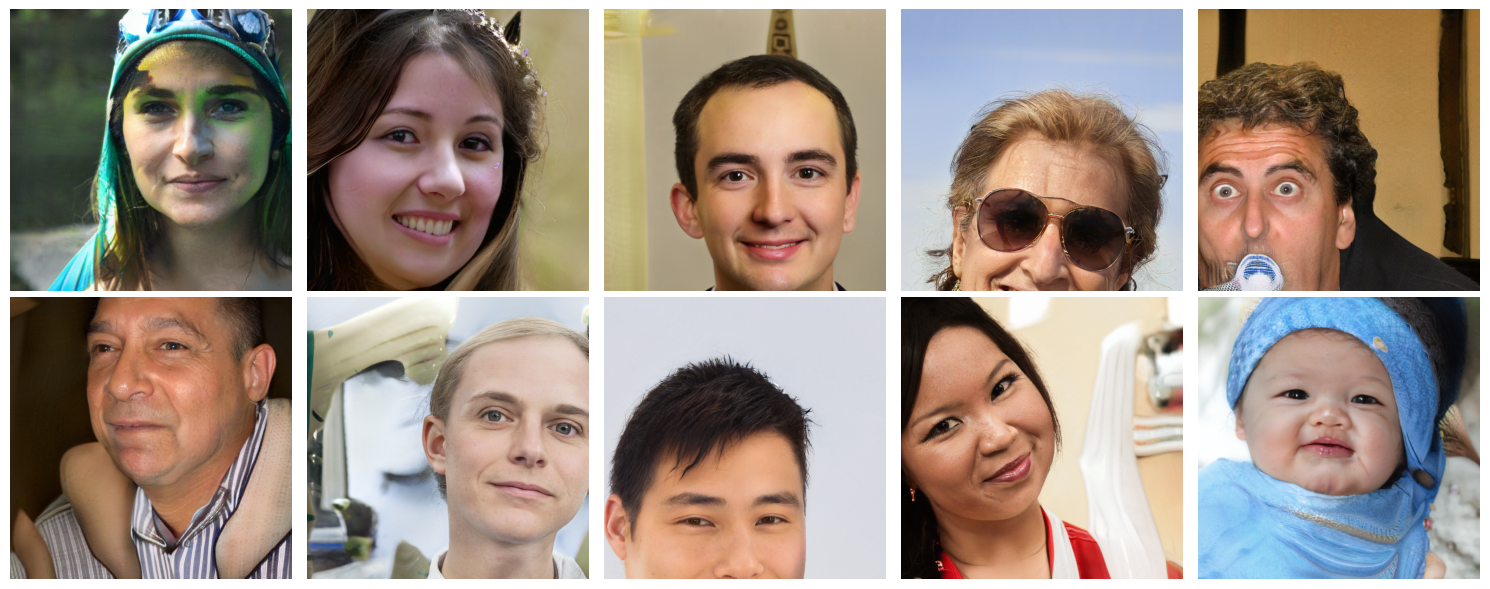

In [ ]:
import matplotlib.pyplot as plt
import os

# Path to the directory containing the generated images
results_dir = '/content/results'

# List the generated image files
image_files = os.listdir(results_dir)

# Select the first 10 images for display
image_files = image_files[:10]

# Plot the images in a 2x5 grid
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i, image_file in enumerate(image_files):
    img = plt.imread(os.path.join(results_dir, image_file))
    axes[i].imshow(img)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
from torchvision import transforms
from PIL import Image

# Function to load and preprocess images
def load_image(image_path):
    image = Image.open(image_path)
    preprocess = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    return preprocess(image).unsqueeze(0)

# Function to extract features from StyleGAN
def extract_features(image, G):
    with torch.no_grad():
        z = torch.randn(1, G.z_dim).to(image.device)
        c = torch.randn(1, G.c_dim).to(image.device)
        w = G.mapping(z, c)
        features = G.synthesis(w, noise_mode='const', force_fp32=True)
    return features

# Function for linear interpolation between features
def linear_interpolation(features1, features2, num_steps=10):
    interpolated_features = []
    for i in range(num_steps + 1):
        alpha = i / num_steps
        interpolated_features.append(alpha * features1 + (1 - alpha) * features2)
    return interpolated_features

# Function to reconstruct images from StyleGAN features
def reconstruct_image(features):
    with torch.no_grad():
        reconstructed_image = features.clamp(min=-1, max=1).cpu().numpy().squeeze().transpose(1, 2, 0)
    return (reconstructed_image + 1) / 2

# Paths to images
my_face_image_path = '/kaggle/input/face-image/IMG-20211128-WA0173.jpg'
dataset_images_paths = [
    '/kaggle/input/face-image/image (1).jpg',
    '/kaggle/input/face-image/image (2).jpg',
    '/kaggle/input/face-image/image(14).jpg',
    '/kaggle/input/face-image/image(94).jpg',
    '/kaggle/input/face-image/image.jpg'
]

# Load and preprocess images
my_face_image = load_image(my_face_image_path)
dataset_images = [load_image(image_path) for image_path in dataset_images_paths]

G = StyleGAN()

my_face_features = extract_features(my_face_image, G)
dataset_features = [extract_features(image, G) for image in dataset_images]

# Interpolate features between my face image and dataset images
interpolated_features = []
for dataset_feature in dataset_features:
    interpolated_features.extend(linear_interpolation(my_face_features, dataset_feature))

# Reconstruct images from interpolated features
reconstructed_images = [reconstruct_image(features) for features in interpolated_features]
